In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
from numpy import dot, exp
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

import copy 

In [3]:
train = pd.read_csv('input/icr-identify-age-related-conditions/train.csv')
# test = pd.read_csv('input/icr-identify-age-related-conditions/test.csv')
greeks = pd.read_csv('input/icr-identify-age-related-conditions/greeks.csv')

# 查看特征分布情况

<Axes: ylabel='Class'>

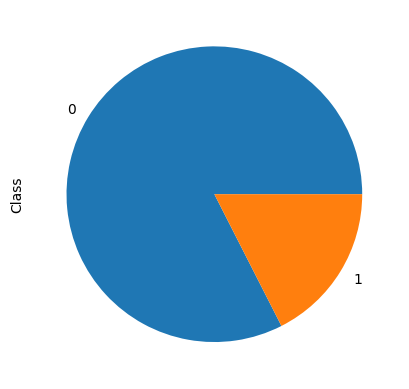

In [4]:
# df=train.dropna(inplace=True,axis=1)
a=train['Class'].value_counts()
a
# plotting a pie chart
plot_df = train.Class.value_counts()
plot_df.plot(kind="pie")

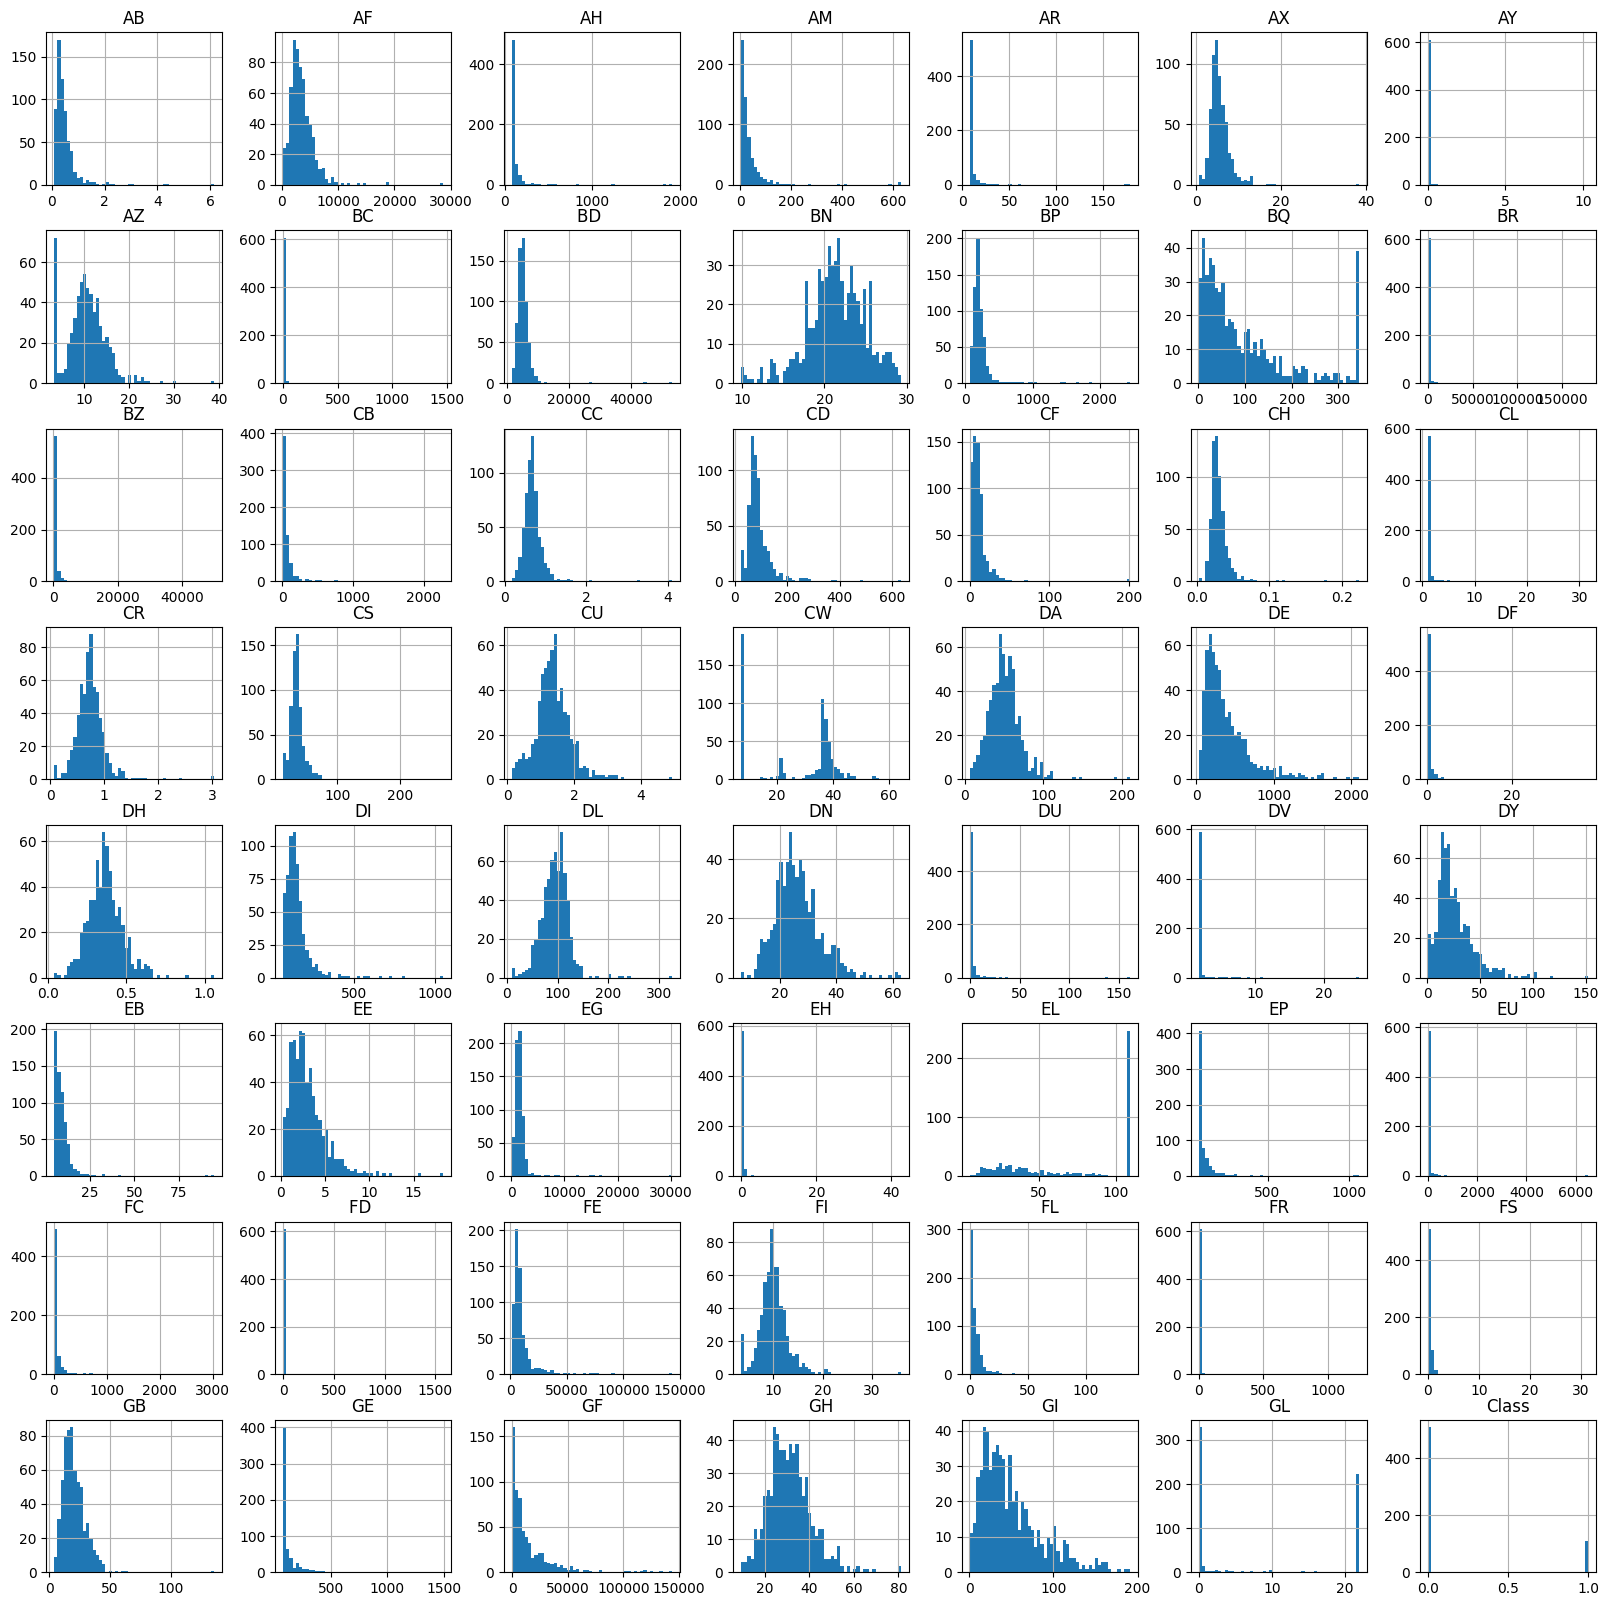

In [5]:
# 了解每个特征的分布
from matplotlib import pyplot
train.hist(bins=50, figsize = [20,20])
pyplot.show()

# 在k-fold 中使用

In [6]:
greeks['k'] = greeks['Alpha']+greeks['Beta']+greeks['Gamma']+greeks['Delta']
train = pd.merge( greeks[['k','Id']],train,on='Id')

names = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']
target_name = 'Class'

# 数据清洗

In [7]:
train['EJ'] = pd.Series(np.where(train.EJ.values == 'A', 1, 0),
          train.index)
# test['EJ'] = pd.Series(np.where(test.EJ.values == 'A', 1, 0),
        #   test.index)

# fill nan data with mean values 
train[names] = train[names].fillna(train[names].mean())
# test[names] = test[names].fillna(train[names].mean())
# clip values to avoid different values in the test set from train
# test = test[names].clip(train[names].min(axis=0).values,train[names].max(axis=0).values, axis=1)

# data scaled to allow the features interaction (by multiplication)
scaler = StandardScaler()

train2 = copy.copy(train)
# teste2 = copy.copy(test)

vals = scaler.fit_transform(train[names])
# vals_test = scaler.transform(test[names])

train2[names] = vals
# teste2[names] = vals_test

In [8]:
train2

,k,Id,AB,AF,AH,AM,AR,AX,AY,AZ,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,BCGD,000ff2bfdfe9,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,...,0.162487,-0.035806,-0.250869,-0.940094,-0.410260,-0.655511,-0.948991,0.531241,-0.815752,1
1,ACMB,007255e47698,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,...,-0.458281,-0.060566,0.113218,-1.145070,-0.410260,0.687893,-0.238862,-0.509218,1.304239,0
2,ACMB,013f2bd269f5,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,...,0.198331,-0.051023,0.596934,1.637944,-0.299210,-0.051850,-0.351743,-0.424754,-0.808323,0
3,ACMB,043ac50845d5,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.729610,-0.083417,0.112088,...,0.060027,-0.060566,-0.105234,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.812311,0
4,DBFB,044fb8a146ec,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,...,0.236971,0.896815,-0.230064,-0.432313,0.099920,-0.318309,1.409422,-0.395228,-0.818054,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,ABMB,fd3dafe738fd,-0.699975,-0.161828,0.040232,-0.422762,0.275215,-0.802577,0.040875,-0.464891,...,-0.458281,-0.045332,-0.271674,-1.177680,0.593022,-0.340465,-0.694915,0.513497,1.304239,0
613,ABMB,fd895603f071,-0.088253,0.852755,-0.261669,0.108831,0.556117,0.170319,-0.082686,0.473063,...,0.417330,-0.045702,0.003992,1.519617,2.535523,-0.599582,-0.186764,2.048314,-0.813328,0
614,ACMB,fd8ef6377f76,-0.106514,-0.453742,0.090140,0.235206,-0.011673,0.990330,-0.083417,1.113828,...,-0.458281,-0.060566,-0.271674,-0.076400,-0.019561,-0.424307,-0.540129,1.903449,1.304239,0
615,ACMB,fe1942975e40,-0.243466,-0.973904,-0.261669,-0.219353,-0.189295,0.955584,-0.083417,-0.699741,...,0.333153,-0.054771,0.191237,0.387591,-0.410260,-0.657500,-0.646592,-0.370599,-0.809518,0


# 定义二阶交互

In [9]:
# def multiply and make a array of all interactions
def mab(df,nome1,nome2):
    a  = df[nome1]*df[nome2]
    return(a/max(a))

h = []
# ht = []

n = 1
for n1 in names:
    for n2 in names[n:]:
        h.append(mab(train2,n1,n2).rename(n1+'_mul_'+n2))
        # ht.append(mab(teste2,n1,n2).rename(n1+'_mul_'+n2))
        
    n+=1
    
newF = pd.DataFrame(h)
# newF_test = pd.DataFrame(ht)

In [10]:
newF

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
AB_mul_AF,0.001197,0.009527,0.000070,-0.000813,-0.000255,0.002700,0.002593,0.005999,0.000393,-0.002924,...,0.001115,-0.000918,-0.001197,0.000907,0.003074,0.001386,-0.000921,0.000591,0.002902,-0.000054
AB_mul_AH,0.002020,0.002504,0.000054,-0.000080,0.000731,0.002020,0.000972,0.001569,0.000989,0.001150,...,0.000408,-0.001203,0.000827,-0.000784,0.002278,-0.000380,0.000312,-0.000130,0.000860,0.000551
AB_mul_AM,0.001895,0.000283,0.000020,-0.003666,0.001028,0.003480,0.001684,0.001580,0.000564,0.001692,...,0.000464,0.008051,0.000615,0.000188,0.004114,0.004121,-0.000134,-0.000349,0.000744,0.000178
AB_mul_AR,0.002846,0.003527,0.000076,0.002392,0.001029,0.002846,-0.003570,0.002210,0.001393,0.001620,...,0.000575,0.013127,0.001166,0.000948,0.003209,-0.005062,-0.001290,0.000033,0.001211,-0.000061
AB_mul_AX,0.015304,0.007489,-0.000100,0.004937,0.001831,0.004840,0.005522,0.001368,0.002355,0.001712,...,-0.000843,-0.001150,-0.000241,0.000978,0.005395,0.007906,-0.000212,-0.001485,-0.003274,-0.000158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GF_mul_GI,-0.026132,-0.026286,0.001653,-0.053789,0.009441,0.032492,-0.060155,-0.013731,-0.004421,0.016874,...,-0.166374,0.001655,0.026805,0.212542,0.003814,-0.013119,-0.092162,-0.060607,0.018285,-0.053876
GF_mul_GL,0.061407,0.103028,0.004813,0.060711,0.029902,0.073565,0.055331,-0.032525,0.049153,-0.070610,...,1.000000,0.036955,0.036272,0.184305,-0.028807,-0.050992,0.056000,-0.063550,0.061122,-0.060639
GH_mul_GI,-0.086243,0.020808,0.025558,0.161693,-0.095292,-0.045357,0.063460,-0.034123,-0.003366,0.078601,...,0.039903,0.014378,0.089654,-0.148751,-0.031606,-0.061043,-0.065442,-0.175877,0.040992,0.438773
GH_mul_GL,0.117661,-0.047350,0.043214,-0.105960,-0.175241,-0.059623,-0.033890,-0.046928,0.021732,-0.190963,...,-0.139250,0.186404,0.070437,-0.074890,0.138584,-0.137753,0.023087,-0.107070,0.079555,0.286724


### WOE和IV
WOE和IV是一种常用的变量筛选方法，可以衡量变量对目标变量的预测能力
- 计算方式
  - 首先，将自变量（X）和目标变量（Y）分别分组，例如对连续型变量进行分箱，对离散型变量进行分类。每个分组称为一个箱（bin） 。
    然后，计算每个箱中正例（Y=1）和负例（Y=0）的数量和比例，分别记为Ni+​，Ni−​，Pi+​，Pi−​。其中i表示第i个箱 。
    接着，计算每个箱的WOE值，即正负例比例之比的自然对数，公式为：

    WOEi​=lnPi−​Pi+​​
    
    WOE值反映了每个箱中正负例的相对分布情况。如果WOE值为正，则表示该箱中正例占比较高；如果WOE值为负，则表示该箱中负例占比较高；如果WOE值为0，则表示该箱中正负例占比相同 。

    最后，计算每个箱的IV部分值，即正负例比例之差乘以WOE值，公式为：

    IVi​=(Pi+​−Pi−​)×WOEi​
    
    然后将所有箱的IV部分值相加，得到整个变量的IV值，公式为：
    
    IV=i=1∑n​IVi​
    
    其中n表示箱的个数。IV值反映了变量对目标变量的预测能力。一般来说，IV值越大，表示变量越重要；IV值越小，表示变量越无关 。


In [11]:
# 计算数据集中各个变量的WOE（证据权重）和IV（信息价值）1。WOE和IV是一种常用的变量筛选方法，可以衡量变量对目标变量的预测能力

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [12]:
a,b = iv_woe(train2, target_name, bins=10, show_woe=False)

In [13]:
# most important features based on IV
a.sort_values(by='IV',ascending=False).Variable.values 

array(['k', 'Id', 'DU', 'GL', 'FL', 'CR', 'DA', 'AF', 'AB', 'BQ', 'DI',
       'EB', 'FD ', 'EE', 'EH', 'FR', 'CD ', 'DE', 'CC', 'BN', 'FI', 'FE',
       'DH', 'EU', 'GF', 'DF', 'BC', 'DL', 'AM', 'BP', 'AH', 'AR', 'GH',
       'DN', 'CS', 'GB', 'DY', 'CF', 'CB', 'GI', 'BD ', 'FC', 'BR', 'CU',
       'FS', 'AZ', 'EL', 'EJ', 'CW ', 'AX', 'GE', 'AY', 'EG', 'EP', 'CH',
       'CL', 'BZ', 'DV'], dtype=object)

In [14]:
# Reordering the dataframe to keep IV with higger values in front
trainE = train[a.sort_values(by='IV',ascending=False).Variable.values]
trainE[target_name] = train[target_name]
# testeE = test[a.sort_values(by='IV',ascending=False).Variable.values[2:]]

# join the original vars and the interactions between them
ff = pd.concat([trainE,newF.T],axis=1)
# ff_teste = pd.concat([testeE,newF_test.T],axis=1)

a,b = iv_woe(ff, target_name, bins=10, show_woe=False)

# deleting all IVs below 0.05
a = a.loc[a['IV']> 0.05]

allNames = a.sort_values(by='IV',ascending=False).Variable.values
crossNames = [x for x in allNames if '_mul_' in x]

nomes2 = list(trainE)+crossNames
nomes2.remove('Class')

In [15]:
# threshold to correlation features
threshold = 0.3

cc = ff[nomes2[2:]].corr()

mat_x = abs(cc)>threshold
mat_x = mat_x.to_numpy()

In [16]:
# selection tof the variables with low correlation, there are +- 70 features with low correlation
var1 = []
nomes = list(cc)
var1.append(nomes[0])
max_vars = 100

count = 1
for n in range(1,len(nomes)):
    
    if (mat_x[n,:n+1].sum() ) == 1:
        
        var1.append(nomes[n])        
        count+=1
        
        if(count == max_vars):
            break

In [17]:
# create dic with WoE transformation
list_dics = []

for var in var1:
  df_temp = b.loc[b['Variable']==var].reset_index()
  # criando dicionario
  dict_var = {}
  for x in range(len(df_temp)):
    line = df_temp.iloc[x]
    dict_var[ line['Cutoff'] ] = line['WoE']
  list_dics.append(dict_var)

In [21]:
list_dics

[{Interval(0.00452, 0.0069, closed='right'): -0.40849676446491806,
  Interval(0.0069, 0.255, closed='right'): -0.7769609161581142,
  Interval(0.255, 0.524, closed='right'): -1.3764226126407366,
  Interval(0.524, 0.817, closed='right'): -1.4115139324520065,
  Interval(0.817, 1.497, closed='right'): -1.4115139324520065,
  Interval(1.497, 3.956, closed='right'): 0.7335556528991812,
  Interval(3.956, 161.355, closed='right'): 2.367077925953425},
 {Interval(0.0001299999999999999, 0.0677, closed='right'): 1.8098279849113876,
  Interval(0.0677, 0.105, closed='right'): 0.6564989134042065,
  Interval(0.105, 0.148, closed='right'): 0.22344584877721316,
  Interval(0.148, 0.206, closed='right'): -0.6652569265781129,
  Interval(0.206, 0.339, closed='right'): -2.5768175956187886,
  Interval(0.339, 5.108, closed='right'): -0.47406497507050566,
  Interval(5.108, 21.978, closed='right'): -0.506550430214994},
 {Interval(0.0682, 0.459, closed='right'): 1.6795285209063093,
  Interval(0.459, 0.564, closed=

In [18]:
# train and test data
df_original = ff[var1+[target_name]+ ['k'] ]
# df_teste2 = ff_teste[var1]
names = var1

In [20]:
names

['DU',
 'GL',
 'CR',
 'DA',
 'AF',
 'EE',
 'FR',
 'DE',
 'CC',
 'BN',
 'FI',
 'FE',
 'DH',
 'EU',
 'GH',
 'DY',
 'CB',
 'FC',
 'BR',
 'FS',
 'AZ',
 'CW ',
 'EG',
 'DU_mul_FE',
 'DA_mul_DU',
 'CR_mul_DE',
 'DI_mul_FE',
 'BQ_mul_FE',
 'BQ_mul_CB',
 'BQ_mul_CW ',
 'DA_mul_DL',
 'CR_mul_GE',
 'EE_mul_GF',
 'CR_mul_FE',
 'BQ_mul_FC',
 'DE_mul_GE',
 'CD _mul_DF',
 'CR_mul_GI',
 'DE_mul_DL',
 'DL_mul_EL',
 'BN_mul_BQ',
 'BN_mul_DA',
 'CU_mul_DN',
 'AZ_mul_GL',
 'CW _mul_DL',
 'DE_mul_EL',
 'CW _mul_EE',
 'BN_mul_CR',
 'DE_mul_GF',
 'DH_mul_EG',
 'CC_mul_EL',
 'CU_mul_EG',
 'DN_mul_FI',
 'AZ_mul_FE',
 'DN_mul_EL',
 'CW _mul_EL',
 'AZ_mul_CU',
 'CW _mul_DY',
 'DH_mul_DL',
 'AX_mul_CU',
 'DY_mul_FI',
 'BN_mul_DE',
 'BN_mul_CW ',
 'BN_mul_DY',
 'AZ_mul_EL',
 'AZ_mul_DE']

In [ ]:
df_original

,DU,GL,CR,DA,AF,EE,FR,DE,CC,BN,...,DH_mul_DL,AX_mul_CU,DY_mul_FI,BN_mul_DE,BN_mul_CW,BN_mul_DY,AZ_mul_EL,AZ_mul_DE,Class,k
0,5.310690,0.120343,0.069225,69.08340,3109.03329,1.987283,1.73855,295.570575,0.563481,22.5984,...,0.030104,0.055419,0.074243,-0.013900,0.045897,-0.013867,0.025989,0.009519,1,BCGD
1,0.005518,21.978000,1.117800,70.79836,978.76416,0.858603,0.49706,178.553100,0.484710,19.4205,...,0.002323,0.007120,-0.008072,0.049509,-0.088762,0.067330,0.103902,-0.078237,0,ACMB
2,1.289739,0.196941,0.700350,70.81970,2635.10654,8.146651,0.97556,321.426625,0.495852,26.4825,...,0.159357,-0.062127,0.056400,-0.045181,-0.124411,0.194822,0.079497,-0.021568,0,ACMB
3,2.655345,0.155829,0.636075,47.27586,3819.65177,3.813326,0.49706,196.607985,0.717882,23.6577,...,0.060110,0.171974,0.431455,-0.050952,-0.054317,0.210658,-0.016445,-0.011873,0,ACMB
4,1.144902,0.096614,0.693150,74.06532,3733.04844,3.490846,48.50134,200.178160,0.536467,24.0108,...,0.231974,0.124720,-0.218851,-0.057965,0.080902,-0.164951,-0.252408,0.171658,1,DBFB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.005518,21.978000,0.698250,21.75904,3130.05946,1.354416,1.26092,355.930925,0.691257,21.1860,...,-0.010561,0.089711,-0.005039,0.001190,0.020246,-0.005250,0.032321,0.011027,0,ABMB
613,0.648318,0.145340,0.761025,43.90996,5462.03438,0.753797,1.24236,157.393715,0.772304,27.1887,...,0.069229,0.046294,-0.023259,-0.156422,0.161061,-0.173654,0.072397,-0.059679,0,ABMB
614,0.005518,21.978000,0.879825,104.62032,2459.10720,2.225112,0.49706,223.209115,0.708616,20.4798,...,0.125464,0.037358,0.144237,0.018620,-0.039017,-0.073073,0.170460,-0.102692,0,ACMB
615,0.510378,0.184622,0.583125,51.04140,1263.53524,1.628524,0.78764,112.196630,0.602254,19.0674,...,0.013768,0.015370,-0.087989,0.075561,-0.096568,-0.102697,-0.000000,0.104593,0,ACMB


In [ ]:
# pandas is giving multiple warnings and making the code "dirty"
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# In this part there is some data leakage as the map is using the full dataset
n= 0

for var in var1:
  df_original.loc[:,var] = df_original[var].map(list_dics[n])
  # df_teste2.loc[:,var] = df_teste2[var].map(list_dics[n])
  
  n=n+1

In [22]:
df_original

,DU,GL,CR,DA,AF,EE,FR,DE,CC,BN,...,DH_mul_DL,AX_mul_CU,DY_mul_FI,BN_mul_DE,BN_mul_CW,BN_mul_DY,AZ_mul_EL,AZ_mul_DE,Class,k
0,5.310690,0.120343,0.069225,69.08340,3109.03329,1.987283,1.73855,295.570575,0.563481,22.5984,...,0.030104,0.055419,0.074243,-0.013900,0.045897,-0.013867,0.025989,0.009519,1,BCGD
1,0.005518,21.978000,1.117800,70.79836,978.76416,0.858603,0.49706,178.553100,0.484710,19.4205,...,0.002323,0.007120,-0.008072,0.049509,-0.088762,0.067330,0.103902,-0.078237,0,ACMB
2,1.289739,0.196941,0.700350,70.81970,2635.10654,8.146651,0.97556,321.426625,0.495852,26.4825,...,0.159357,-0.062127,0.056400,-0.045181,-0.124411,0.194822,0.079497,-0.021568,0,ACMB
3,2.655345,0.155829,0.636075,47.27586,3819.65177,3.813326,0.49706,196.607985,0.717882,23.6577,...,0.060110,0.171974,0.431455,-0.050952,-0.054317,0.210658,-0.016445,-0.011873,0,ACMB
4,1.144902,0.096614,0.693150,74.06532,3733.04844,3.490846,48.50134,200.178160,0.536467,24.0108,...,0.231974,0.124720,-0.218851,-0.057965,0.080902,-0.164951,-0.252408,0.171658,1,DBFB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.005518,21.978000,0.698250,21.75904,3130.05946,1.354416,1.26092,355.930925,0.691257,21.1860,...,-0.010561,0.089711,-0.005039,0.001190,0.020246,-0.005250,0.032321,0.011027,0,ABMB
613,0.648318,0.145340,0.761025,43.90996,5462.03438,0.753797,1.24236,157.393715,0.772304,27.1887,...,0.069229,0.046294,-0.023259,-0.156422,0.161061,-0.173654,0.072397,-0.059679,0,ABMB
614,0.005518,21.978000,0.879825,104.62032,2459.10720,2.225112,0.49706,223.209115,0.708616,20.4798,...,0.125464,0.037358,0.144237,0.018620,-0.039017,-0.073073,0.170460,-0.102692,0,ACMB
615,0.510378,0.184622,0.583125,51.04140,1263.53524,1.628524,0.78764,112.196630,0.602254,19.0674,...,0.013768,0.015370,-0.087989,0.075561,-0.096568,-0.102697,-0.000000,0.104593,0,ACMB


In [ ]:
df_original.loc[:,names] = df_original[names].fillna(df_original[names].mean())
# df_teste2.loc[:,names] = df_teste2[names].fillna(df_original[names].mean())

In [ ]:
# 自定义损失函数
from sklearn.utils import class_weight

def balanced_log_loss(y_true, y_pred):
    class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_true), y = y_true)
    weights = class_weights[y_true.astype(int)]
    loss = log_loss(y_true, y_pred, sample_weight=weights)
    return loss

# LogisticRegression

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
n_splits = 10

predictions_LR = 0
cv_score_LR = 0
train_loss_score_LR = 0
train_score_LR = 0
test_score_LR = 0

rr = [42,21,100,45,1]
for v_fold in rr:
    print(v_fold)
    skf = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=v_fold)
    for i, (train_index, test_index) in enumerate(skf.split(df_original[target_name], df_original['k'])):

            model = LogisticRegression(random_state=0,C=0.1,n_jobs=-1,max_iter=2000,class_weight='balanced')

            df_train = df_original.iloc[train_index]
            df_test = df_original.iloc[test_index]
            
            
            df_train1 = df_train[names].to_numpy()
            df_test1 = df_test[names].to_numpy()            
            
            
            model.fit( df_train1, df_train[target_name])

            train_score_LR += model.score(df_train1, df_train[target_name])
            test_score_LR += model.score(df_test1, df_test[target_name])


            y_hat_teste_LR = model.predict_proba(df_test1)
            cv_score_LR += balanced_log_loss(df_test[target_name],y_hat_teste_LR)       


            y_hat_train_LR = model.predict_proba(df_train1) 
            train_loss_score_LR += balanced_log_loss(df_train[target_name],y_hat_train_LR)  
            # predictions_LR += model.predict_proba(df_teste2[names])
                  

         
print('Train loss:', train_loss_score_LR/(10*len(rr)) )
print('CV score loss: ', cv_score_LR/(10*len(rr)) )
print('train score: ', train_score_LR/(10*len(rr)) )
print('test score: ', test_score_LR/(10*len(rr)) )
# predictions_LR= predictions_LR/(10*len(rr))



42
21
100
45
1
Train loss: 0.13281860373075788
CV score loss:  0.1893868728837159
train score:  0.9522779830189901
test score:  0.9432575356953996


# RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

n_splits = 10

predictions_RFC = 0
cv_score_RFC = 0
train_loss_score_RFC = 0
train_score_RFC = 0
test_score_RFC = 0

rr = [42,21,100,45,1]
for v_fold in rr:
    print(v_fold)
    skf = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=v_fold)
    for i, (train_index, test_index) in enumerate(skf.split(df_original[target_name], df_original['k'])):

            model1 = RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)

            df_train = df_original.iloc[train_index]
            df_test = df_original.iloc[test_index]
            
            
            df_train1 = df_train[names].to_numpy()
            df_test1 = df_test[names].to_numpy()            
            
            
            model1.fit( df_train1, df_train[target_name])

            train_score_RFC += model1.score(df_train1, df_train[target_name])
            test_score_RFC += model1.score(df_test1, df_test[target_name])


            y_hat_teste_RFC = model1.predict_proba(df_test1)
            cv_score_RFC += balanced_log_loss(df_test[target_name],y_hat_teste_RFC)       


            y_hat_train_RFC = model1.predict_proba(df_train1) 
            train_loss_score_RFC += balanced_log_loss(df_train[target_name],y_hat_train_RFC)  
            # predictions_LR += model.predict_proba(df_teste2[names])
                  

         
print('Train loss:', train_loss_score_RFC/(10*len(rr)) )
print('CV score loss: ', cv_score_RFC/(10*len(rr)) )
print('train score: ', train_score_RFC/(10*len(rr)) )
print('test score: ', test_score_RFC/(10*len(rr)) )
# predictions_LR= predictions_LR/(10*len(rr))



42
21
100
45
1
Train loss: 0.14235853893804143
CV score loss:  0.4559277989240336
train score:  1.0
test score:  0.9099365415124276


# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,ConfusionMatrixDisplay
n_splits = 10

predictions_XGB = 0
cv_score_XGB = 0
train_loss_score_XGB = 0
train_score_XGB = 0
test_score_XGB = 0

rr = [42,21,100,45,1]
for v_fold in rr:
    print(v_fold)
    skf = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=v_fold)
    for i, (train_index, test_index) in enumerate(skf.split(df_original[target_name], df_original['k'])):

            model2 =XGBClassifier()

            df_train = df_original.iloc[train_index]
            df_test = df_original.iloc[test_index]
            
            
            df_train1 = df_train[names].to_numpy()
            df_test1 = df_test[names].to_numpy()            
            
            
            model2.fit( df_train1, df_train[target_name])

            train_score_XGB += model2.score(df_train1, df_train[target_name])
            test_score_XGB += model2.score(df_test1, df_test[target_name])


            y_hat_teste_XGB = model2.predict_proba(df_test1)
            cv_score_XGB += balanced_log_loss(df_test[target_name],y_hat_teste_XGB)       


            y_hat_train_XGB = model2.predict_proba(df_train1) 
            train_loss_score_XGB += balanced_log_loss(df_train[target_name],y_hat_train_XGB)  
            # predictions_LR += model.predict_proba(df_teste2[names])
                  

         
print('Train loss:', train_loss_score_XGB/(10*len(rr)) )
print('CV score loss: ', cv_score_XGB/(10*len(rr)) )
print('train score: ', train_score_XGB/(10*len(rr)) )
print('test score: ', test_score_XGB/(10*len(rr)) )
# predictions_LR= predictions_LR/(10*len(rr))



42
21
100
45
1
Train loss: 0.010121130175125226
CV score loss:  0.49072009009756407
train score:  1.0
test score:  0.9209307244843999


# SVC

In [ ]:
from sklearn.svm import SVC

n_splits = 10

predictions_SVC = 0
cv_score_SVC = 0
train_loss_score_SVC = 0
train_score_SVC = 0
test_score_SVC = 0

rr = [42,21,100,45,1]
for v_fold in rr:
    print(v_fold)
    skf = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=v_fold)
    for i, (train_index, test_index) in enumerate(skf.split(df_original[target_name], df_original['k'])):

            model3 =SVC(kernel = 'rbf', probability=True)

            df_train = df_original.iloc[train_index]
            df_test = df_original.iloc[test_index]
            
            
            df_train1 = df_train[names].to_numpy()
            df_test1 = df_test[names].to_numpy()            
            
            
            model3.fit( df_train1, df_train[target_name])

            train_score_SVC += model3.score(df_train1, df_train[target_name])
            test_score_SVC += model3.score(df_test1, df_test[target_name])


            y_hat_teste_SVC = model3.predict_proba(df_test1)
            cv_score_SVC += balanced_log_loss(df_test[target_name],y_hat_teste_SVC)       


            y_hat_train_SVC = model3.predict_proba(df_train1) 
            train_loss_score_SVC += balanced_log_loss(df_train[target_name],y_hat_train_SVC)  
            # predictions_LR += model.predict_proba(df_teste2[names])
                  

         
print('Train loss:', train_loss_score_SVC/(10*len(rr)) )
print('CV score loss: ', cv_score_SVC/(10*len(rr)) )
print('train score: ', train_score_SVC/(10*len(rr)) )
print('test score: ', test_score_SVC/(10*len(rr)) )
# predictions_LR= predictions_LR/(10*len(rr))



42
21
100
45
1
Train loss: 0.06625989534195549
CV score loss:  0.2419118801254251
train score:  0.9928689480847752
test score:  0.9459175039661555


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

n_splits = 10

predictions_DTC = 0
cv_score_DTC = 0
train_loss_score_DTC = 0
train_score_DTC = 0
test_score_DTC = 0

rr = [42,21,100,45,1]
for v_fold in rr:
    print(v_fold)
    skf = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=v_fold)
    for i, (train_index, test_index) in enumerate(skf.split(df_original[target_name], df_original['k'])):

            model4 =DecisionTreeClassifier(max_depth = 10,max_features = 100, criterion= 'entropy')

            df_train = df_original.iloc[train_index]
            df_test = df_original.iloc[test_index]
            
            
            df_train1 = df_train[names].to_numpy()
            df_test1 = df_test[names].to_numpy()            
            
            
            model4.fit( df_train1, df_train[target_name])

            train_score_DTC += model4.score(df_train1, df_train[target_name])
            test_score_DTC += model4.score(df_test1, df_test[target_name])


            y_hat_teste_DTC = model4.predict_proba(df_test1)
            cv_score_DTC += balanced_log_loss(df_test[target_name],y_hat_teste_DTC)       


            y_hat_train_DTC = model4.predict_proba(df_train1) 
            train_loss_score_SVC += balanced_log_loss(df_train[target_name],y_hat_train_DTC)  
            # predictions_LR += model.predict_proba(df_teste2[names])
                  

         
print('Train loss:', train_loss_score_DTC/(10*len(rr)) )
print('CV score loss: ', cv_score_DTC/(10*len(rr)) )
print('train score: ', train_score_DTC/(10*len(rr)) )
print('test score: ', test_score_DTC/(10*len(rr)) )
# predictions_LR= predictions_LR/(10*len(rr))



42
21
100
45
1
Train loss: 0.0
CV score loss:  7.268050472383647
train score:  0.9999279279279278
test score:  0.8775198307773663
